# Section 11: Using the ACT likelihood 

In this section we will use the pyactlike package to calculate the likelihood of a sample spectrum given the ACT data.   This package is available on [GitHub](https://github.com/ACTCollaboration/pyactlike) and was developed for Aiola et al. 2020 and Choi et al. 2020. This package is based off of the Fortran implementation written by Erminia Calabrese and Jo Dunkley. 

We ask that when using these data products you reference the original work in Aiola et al. 2020 and Choi et al. 2020

To return to the main notebook or to view a different section use the links in the table of contents.



## Table of contents

 --- 
> [Section 1](Section_1_Introduction.ipynb): Introduction to AdvACT Data Release 4

> [Section 2](Section_2_coadded_maps.ipynb): S08-18 Coadded maps from [Naess et al. (2020)](https://www.overleaf.com/5395816498bsknshgxbmyr) and an Introduction to Pixell

> [Section 3](Section_3_HEALPix_CAR_Conversions.ipynb):  Demonstration of methods to convert maps between HEALPix format and the CAR format.

> [Section 4](Section_4_visualize_objects.ipynb):  Guide to using Pixell to look at objects in the maps and stacking our maps on catalogue positions.

> [Section 5](Section_5_Lensing_maps.ipynb):  Introduction to the Lensing maps from [Darwish et al](https://arxiv.org/pdf/2004.01139.pdf)

> [Section 6](Section_6_Component_separated_maps.ipynb):  Guide to the use of the Component Separated maps from [Madhavacheril et al. (2020)](https://arxiv.org/abs/1911.05717)

> [Section 7](Section_7_power_spectra_part_1.ipynb): Harmonic Analysis using CAR maps [Naess et al, in preparation]

> [Section 8](Section_8_power_spectra_part_2.ipynb): Power Spectrum example using Nawrapper [Aiola et al] and [Choi et al] 

> [Section 9](Section_9_Noise_sims.ipynb): Generating Noise Simulations 

> [Section 10](Section_10_E_B_maps.ipynb):  Look at how to generate E and B maps from I, Q, U maps. 

> [Section 11](Section_11_ACT_likelihood.ipynb): Using the ACT Likelihood code
 
> [Section 12](Section_12_delensing_param_shifts.ipynb):  Delensing the CMB powerspectrum and comparing the delensed and lensed parameters from [Han et al. 2020, in preparation]
---


We begin by importing the neccessary packages, in particular the pyactlike package discussed above.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'
%run Section_1_Introduction.ipynb

import matplotlib.pyplot as plt
import numpy as np
import pyactlike
import camb

## Step 1: read in some included example spectra and plot them

We will first evaluate the likelihood of theory spectra in the context of our combined WMAP + ACTPol data set. In particular, we examine the maximum likelihood model:

In [36]:
# Read an the spectra from disk.
filename = like.data_dir + "bf_ACTPol_WMAP_lcdm.minimum.theory_cl"

tt_lmax = 6000
ell, dell_tt, dell_te, dell_ee = np.genfromtxt(
    filename,
    delimiter=None,
    unpack=True,
    max_rows=tt_lmax - 1,
    usecols=(0, 1, 2, 3),
)

And we can plot the auto-spectra, for convenience:

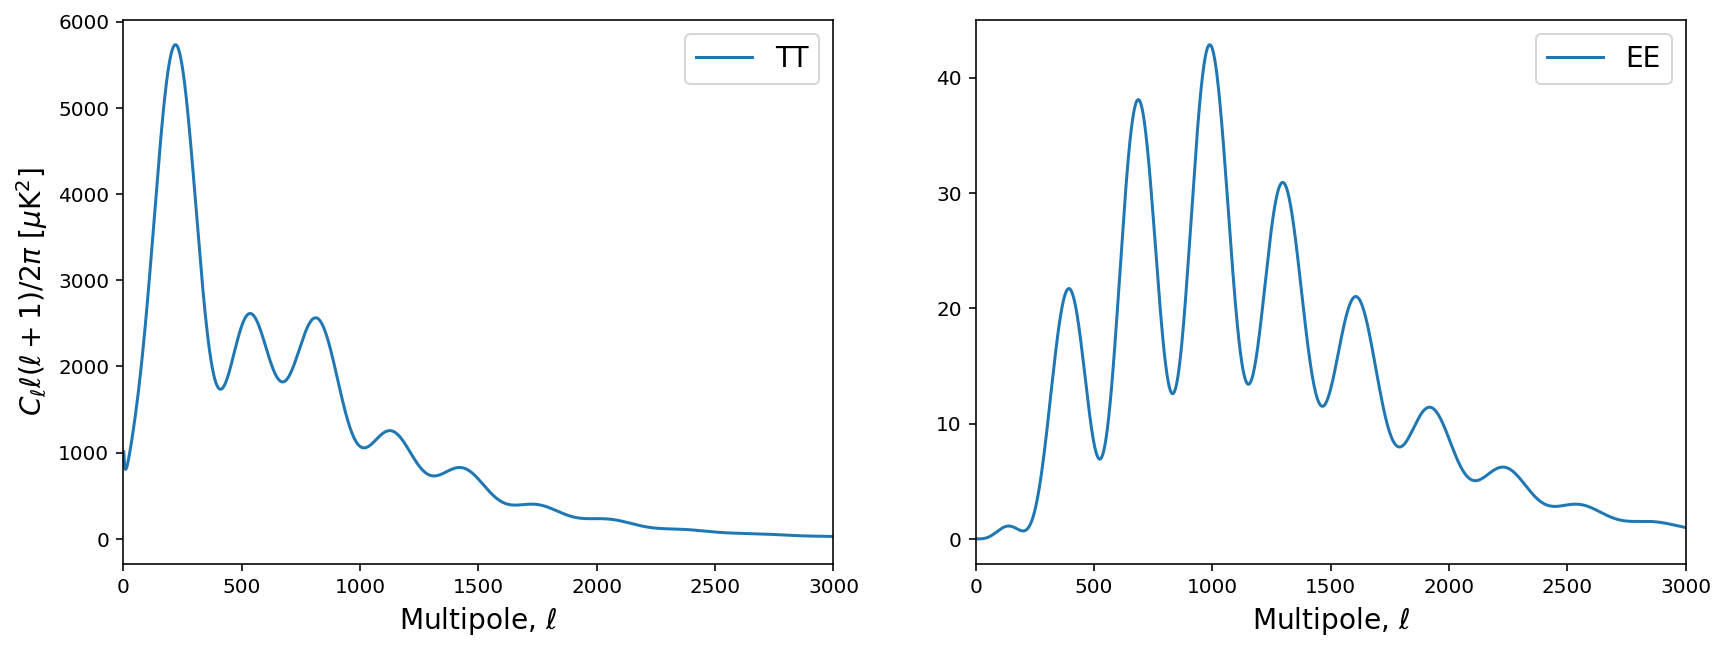

In [11]:
# Let's quickly plot these spectra 

plt.figure(figsize = (14, 5))

plt.subplot(1,2,1)
plt.plot(ell, dell_tt, "-", label="TT")
plt.ylabel(r"$C_{\ell} \ell (\ell+1) / 2 \pi$ $[\mu$K$^2]$", fontsize = 14)
plt.xlabel(r"Multipole, $\ell$", fontsize = 14)
plt.legend(fontsize = 14)
plt.xlim(0,3000)

plt.subplot(1,2,2)
plt.plot(ell, dell_ee, "-", label="EE")
plt.xlabel(r"Multipole, $\ell$", fontsize = 14)
plt.legend(fontsize = 14)
plt.xlim(0,3000)

plt.show()

## Step 2: Compute the likelihood of the spectrum given the ACT data

The first step is to initialize the pyactlike "likelihood" object, which contains the observed data and methods for parameter estimation. In particular, we utilize the the `loglike` method, which take as an argument the experimental polzarization efficiency, see Aoila et. al. for a discussion. In this step we also compare to the expected $\chi^2$ value, and note that they match:

In [3]:
# compute the likelihood 


# now that we have WMAP + ACT theory spectra loaded we need to
# set the polarization efficiency
yp2_act_wmap = 1.003

# we can evaluate the likelihood of the WMAP + ACT spectra as follows:
like = pyactlike.ACTPowerSpectrumData()
chi2 = -2 * like.loglike(dell_tt, dell_te, dell_ee, yp2_act_wmap)
print("ACT + WMAP chi2 = " + "{0:.12f}".format(chi2))
print("Expected:         288.252869629064")

ACT + WMAP chi2 = 288.253022410716
Expected:         288.252869629064


The expected $\chi^2$ is defined by TO BE FILLED IN. Note that as the likelihood methods are bundled together in the particular instance object, as documented in [pyactlike](https://github.com/ACTCollaboration/pyactlike), the evaluation of particular fiducial spectra is highly modular.

### ACTPol-only Likelihood
We can also peform a similar task using the ACTPol-only likelihood.  To do so we need to adjust `yp2` to 1.001, and for comparison's sake, we load a new spectrum -- that which maximizes the likelihood at the new value of `yp2`:

In [44]:
# Read in the act only spectra
filename = like.data_dir + "bf_ACTPol_lcdm.minimum.theory_cl"

tt_lmax = 6000
ell, dell_tt, dell_te, dell_ee = np.genfromtxt(
    filename,
    delimiter=None,
    unpack=True,
    max_rows=tt_lmax - 1,
    usecols=(0, 1, 2, 3),
)

# Set the new yp2 value
yp2_act_only = 1.001

# Now let's look at the chi2 using pyactlike
like = pyactlike.ACTPowerSpectrumData()
chi2 = -2 * like.loglike(dell_tt, dell_te, dell_ee, yp2_act_only)
print("ACT only chi2 = " + "{0:.12f}".format(chi2))
print("Expected:       279.004901885481")

ACT only chi2 = 279.005057627001
Expected:       279.004901885481


We will cement the utility of our power spectra data, and the pyactlike code, in Step 4 of this notebook.

## Step 3: Compare the Theory to the Data 

Now let's take a moment to compare our theoretical predictions to the data. In order to do se we want to identify the TT, TE and EE bins, data and errors. We will look at the 'wide' patch data. The particular spectrum (TT, EE, etc.) and coadded patch information is set by the indices applied to the `like` instance variables:

In [12]:
wmin=130 #first element of TT for wide patch
wmax=130+40 #last element of TT for wide patch

# Read in the ell values for the data
TT_bval=like.bval[wmin:wmax]

# Compute the Dl values using Dl = cl*ell**2/(2*pi) 
TT_dat=like.X_data[wmin:wmax]*like.bval[wmin:wmax]**2/(2.*np.pi)

# Read in the error which also needs to be converted to an error in Dl
TT_err=like.X_sig[wmin:wmax]*like.bval[wmin:wmax]**2/(2.*np.pi)

And we plot the data, with error bars, against the ACTPol-only maximum likelihood theory spectra (e.g., the TT autospectrum):

(0.0, 6000.0)

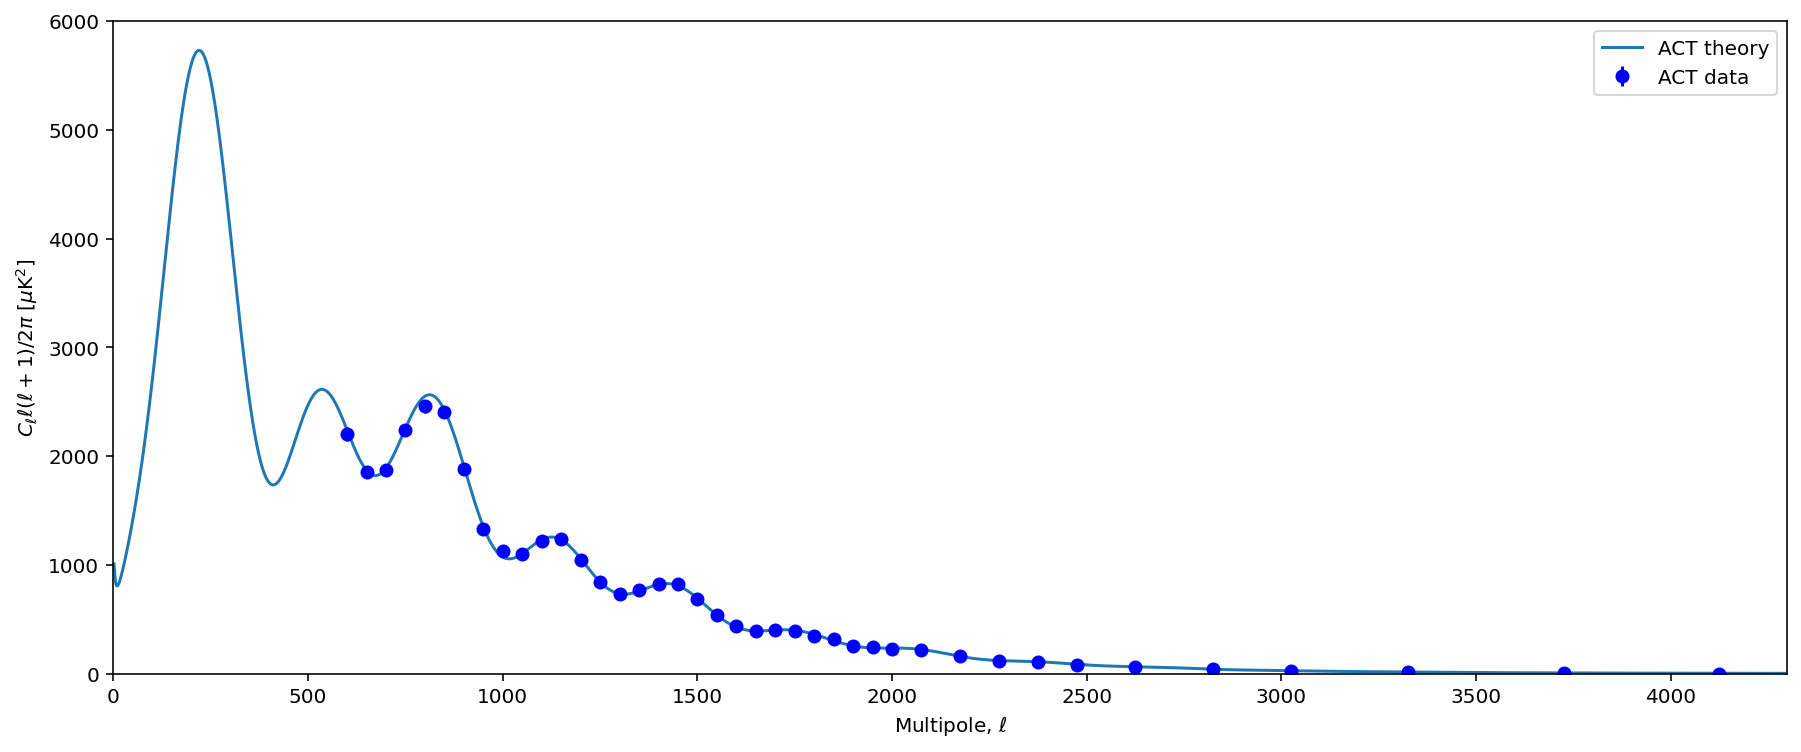

In [13]:
# Now we can plot this data along with the theory from above 
plt.figure(figsize=(15,6))

plt.plot(ell, dell_tt, "-", label="ACT theory")
plt.errorbar(TT_bval,TT_dat,yerr = TT_err, fmt='bo',label="ACT data")
plt.xlabel(r"Multipole, $\ell$")
plt.ylabel(r"$C_{\ell} \ell (\ell+1) / 2 \pi$ $[\mu$K$^2]$")
plt.legend()
plt.xlim(0,4300)
plt.ylim(0,6000)

By eye this looks pretty good, our data points seem to fit our theory extremely well.  We can test this more explicitly by looking at the residuals and printing out a simplified diagonal $\chi^2$.  It's worth noting that in order to get the full $\chi^2$ one would need to use the full likelihood (e.g., using the bin-bin covariance matrices from [Section 8](Section_8_power_spectra_part_2.ipynb)) instead of this simplified version.

Now identify the bandpower window functions to bin the theory, plot residuals, and also print simplified diagonal $\chi^2$ (again, for fully-accurate $\chi^2$, use the full likelihood!). First, we obtain a binned theory spectrum, to compare with the binned data stored inside `like`:

ACT TT-wide diagonal chi2 = 39.28 for 40 data points


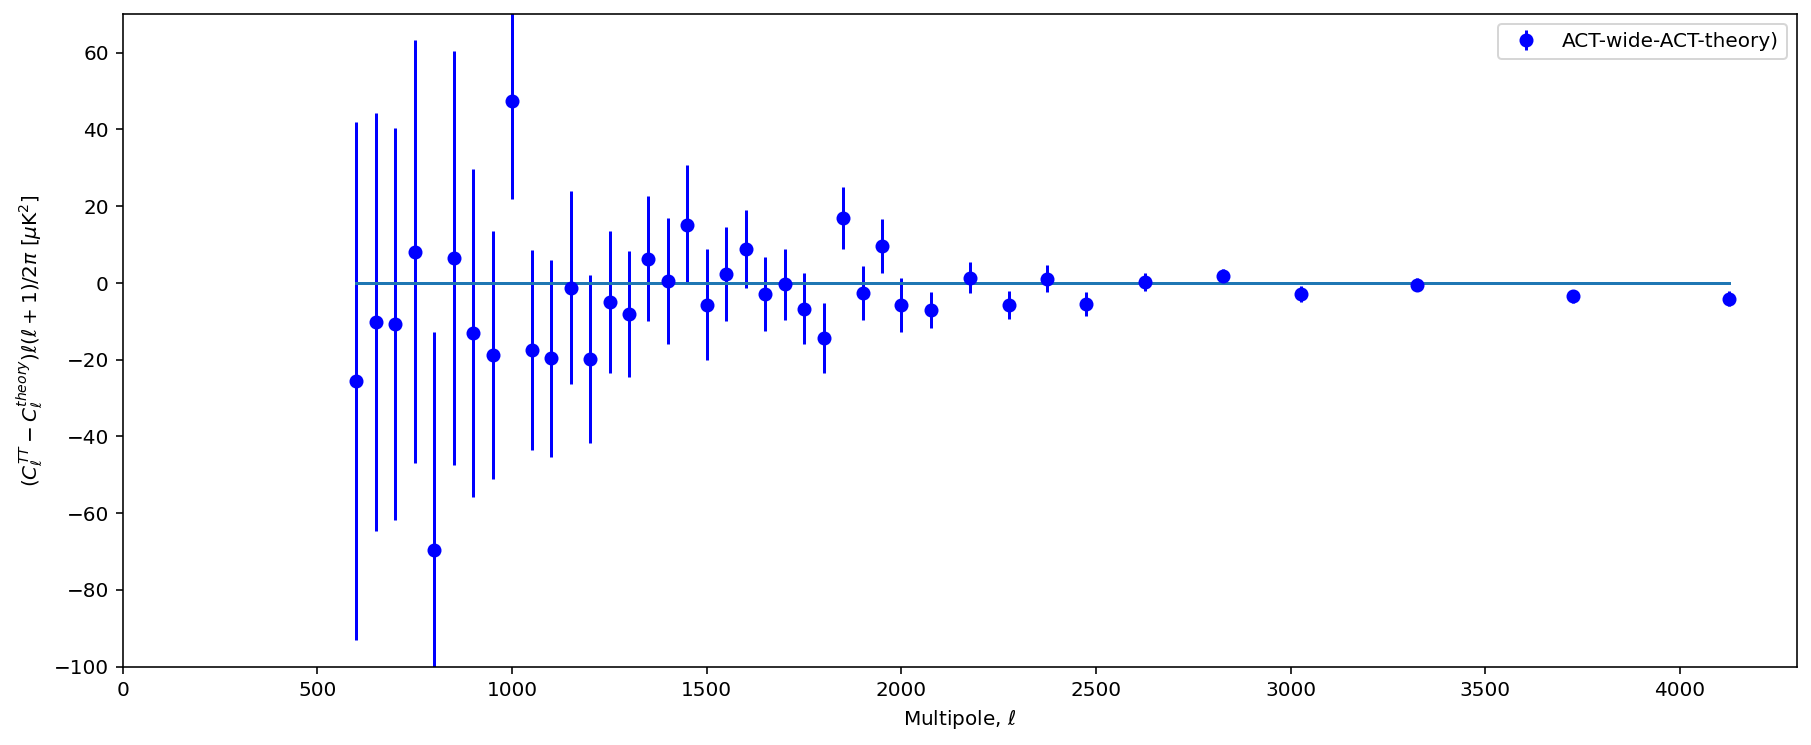

In [6]:
# We begin by creating an array of ell values the range from 2 to 5000
l_list = np.array(range(2, like.tt_lmax + 1))

# Our data above was binned and so in order to compare to theory we 
# will need to similarly bin the theory curve from above

# Start by reading in the Dl values annd converting to cls
cltt = np.zeros(like.lmax_win)
cltt[1 : like.tt_lmax] = (dell_tt[: like.tt_lmax - 1] / l_list / (l_list + 1.0) * 2.0 * np.pi)

# now we bin these cl values just as we did for the data above
bmax, lmax_win = like.bmax, like.lmax_win
cth_tt = like.win_func_w[2 * bmax : 3 * bmax, 1:lmax_win] @ cltt[1:lmax_win] 

# We convert the binned cl values back to binned Dl by multiplying through by l(l+1)/2pi
dth_tt = cth_tt[like.b0:like.b0+like.nbintt]*like.bval[wmin:wmax]**2/(2.*np.pi) 

Now that we have binned the theory curve, we can directly compare it to our ACTPol-only binned data:

(-100.0, 70.0)

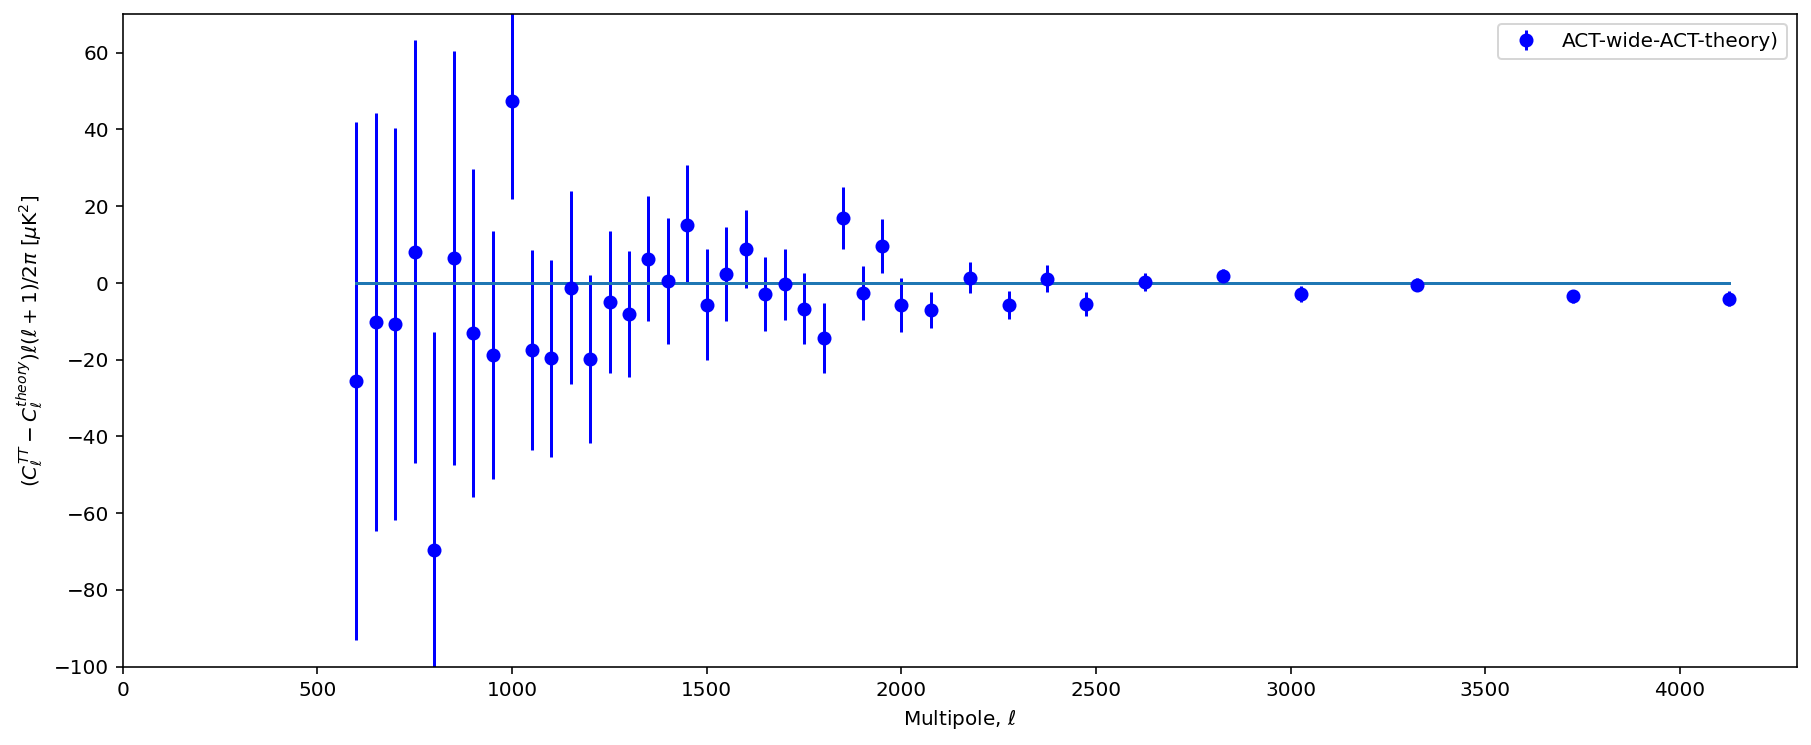

In [14]:
# Now we have binned data and binned theory and so can plot the residuals
plt.figure(figsize=(15,6))
plt.errorbar(TT_bval,TT_dat-dth_tt,yerr = TT_err, fmt='bo',label="ACT-wide-ACT-theory)")
plt.plot(TT_bval, (TT_dat-dth_tt)*0.)
plt.xlabel(r"Multipole, $\ell$")
plt.ylabel(r"$(C_{\ell}^{TT}-C_{\ell}^{theory}) \ell (\ell+1) / 2 \pi$ $[\mu$K$^2]$")
plt.legend()
plt.xlim(0,4300)
plt.ylim(-100,70)

Finally, from the residuals and errors we loaded earlier, we can evaluate our "diagonal" $\chi^2$:

In [15]:
# We can also find the chisq of this binned data and print it out
chi_act_TT = (TT_dat-dth_tt)**2/TT_err**2
print("ACT TT-wide diagonal chi2 = " + "{0:.2f}".format(np.sum(chi_act_TT))+ " for 40 data points")

ACT TT-wide diagonal chi2 = 39.28 for 40 data points


### Repeat the process for TE and EE

The process above can be repeated for both TE and EE in order to look at the residuals, and spectra-specific likelihoods, for polarization. Again, the polarization components *and* coadded patch are set by the indices of the `like` instance variables; see the definition of the `ACTPowerSpectrumData` class in [pyactlike](https://github.com/ACTCollaboration/pyactlike). First, read in the binned data and errors:

In [16]:
wmin_TE, wmax_TE= 130+40, 130+40+45   #set the bounds for TE
wmin_EE, wmax_EE= 130+85, 130+85+45   #set the bounds for EE

# As before we read in the ell, Dl, and error values
# For TE
TE_bval=like.bval[wmin_TE:wmax_TE]
TE_dat=like.X_data[wmin_TE:wmax_TE]*like.bval[wmin_TE:wmax_TE]**2/(2.*np.pi)
TE_err=like.X_sig[wmin_TE:wmax_TE]*like.bval[wmin_TE:wmax_TE]**2/(2.*np.pi)

# For EE
EE_bval=like.bval[wmin_EE:wmax_EE]
EE_dat=like.X_data[wmin_EE:wmax_EE]*like.bval[wmin_EE:wmax_EE]**2/(2.*np.pi)
EE_err=like.X_sig[wmin_EE:wmax_EE]*like.bval[wmin_EE:wmax_EE]**2/(2.*np.pi)

As with TT, we can plot the data against the (maximum-likelihood, ACTPol-only) TE and EE spectra:

(0.0, 4300.0)

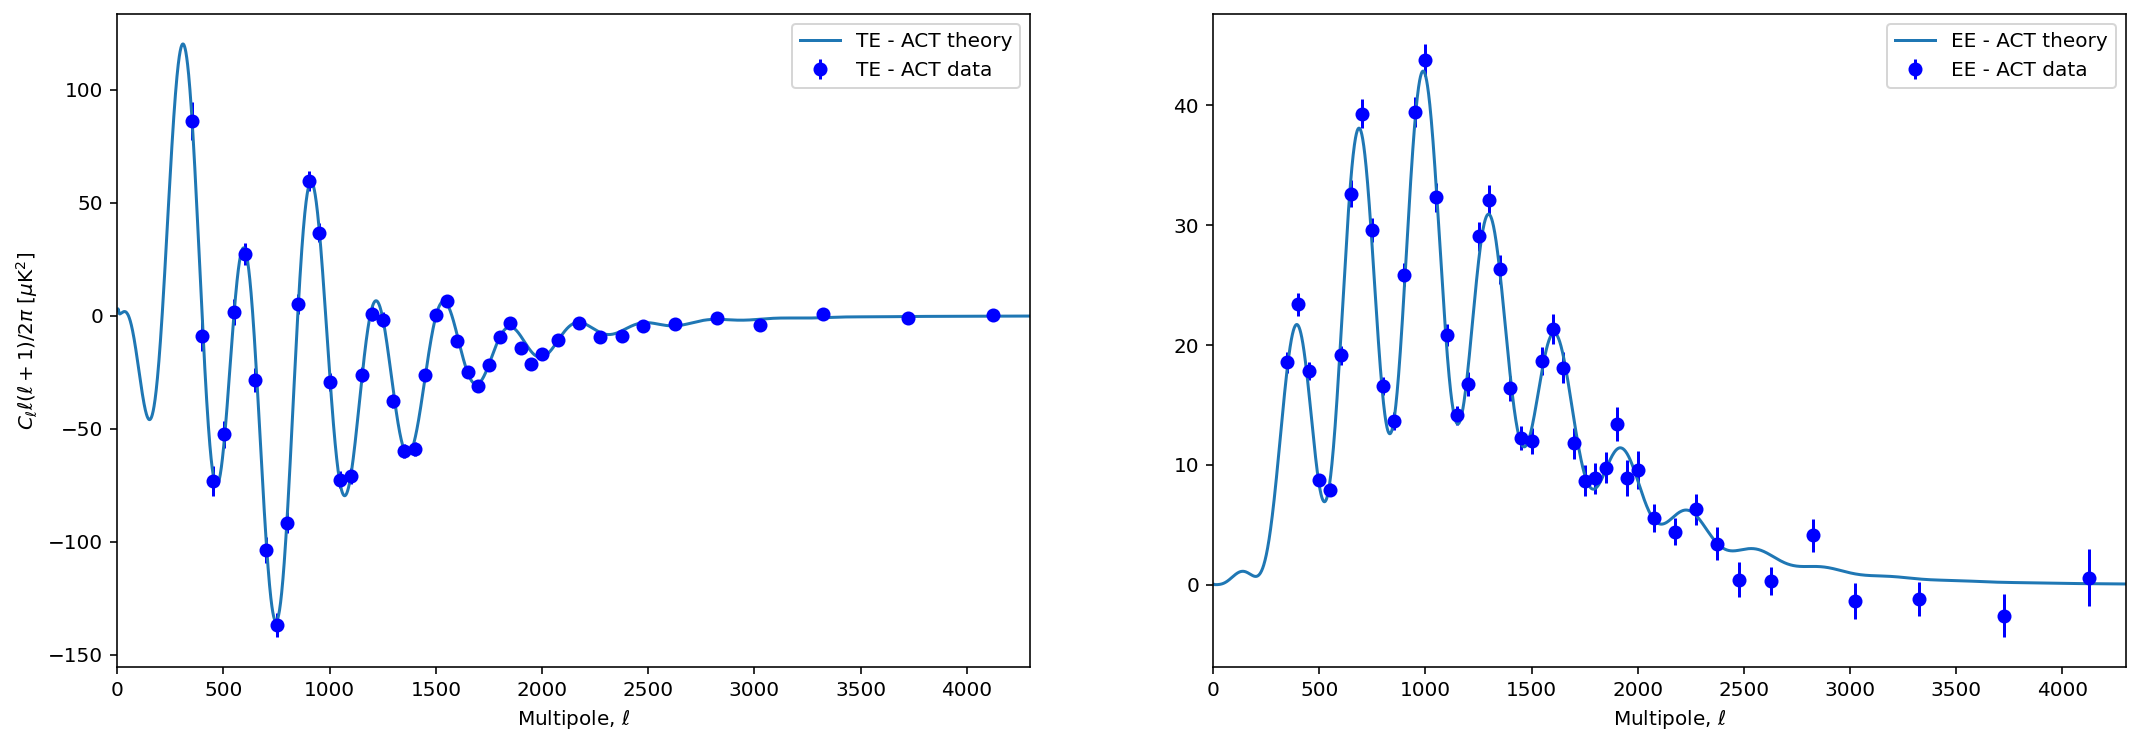

In [25]:
# Let's plot the TE and EE spectra
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.plot(ell, dell_te, "-", label="TE - ACT theory")
plt.errorbar(TE_bval,TE_dat,yerr = TE_err, fmt='bo', label="TE - ACT data")
plt.xlabel(r"Multipole, $\ell$")
plt.ylabel(r"$C_{\ell} \ell (\ell+1) / 2 \pi$ $[\mu$K$^2]$")
plt.legend()
plt.xlim(0,4300)

plt.subplot(1,2,2)
plt.plot(ell, dell_ee, "-", label="EE - ACT theory")
plt.errorbar(EE_bval,EE_dat,yerr = EE_err, fmt='bo', label="EE - ACT data")
plt.xlabel(r"Multipole, $\ell$")
plt.legend()
plt.xlim(0,4300)

We can now look at the residuals as well as the $\chi^2$ for these two spectra. As before, the first step is to bin the theory curves, so that we can compare it directly with our data:

In [26]:
# Start by binning the EE thoery
clee = np.zeros(like.lmax_win)
clee[1 : like.tt_lmax] = (dell_ee[: like.tt_lmax - 1] / l_list / (l_list + 1.0) * 2.0 * np.pi)
bmax, lmax_win = like.bmax, like.lmax_win
cth_ee = like.win_func_w[9 * bmax : 10 * bmax, 1:lmax_win] @ clee[1:lmax_win] 
dth_ee = cth_ee[:like.nbinee]*like.bval[wmin_EE:wmax_EE]**2/(2.*np.pi) 

# Next let's bin the TE theory
clte = np.zeros(like.lmax_win)
clte[1 : like.tt_lmax] = (dell_te[: like.tt_lmax - 1] / l_list / (l_list + 1.0) * 2.0 * np.pi)
bmax, lmax_win = like.bmax, like.lmax_win
cth_te = like.win_func_w[6 * bmax : 7 * bmax, 1:lmax_win] @ clte[1:lmax_win] 
dth_te = cth_te[:like.nbinte]*like.bval[wmin_TE:wmax_TE]**2/(2.*np.pi) 

Then, we can plot the residuals as a function of $\ell$, by bin:

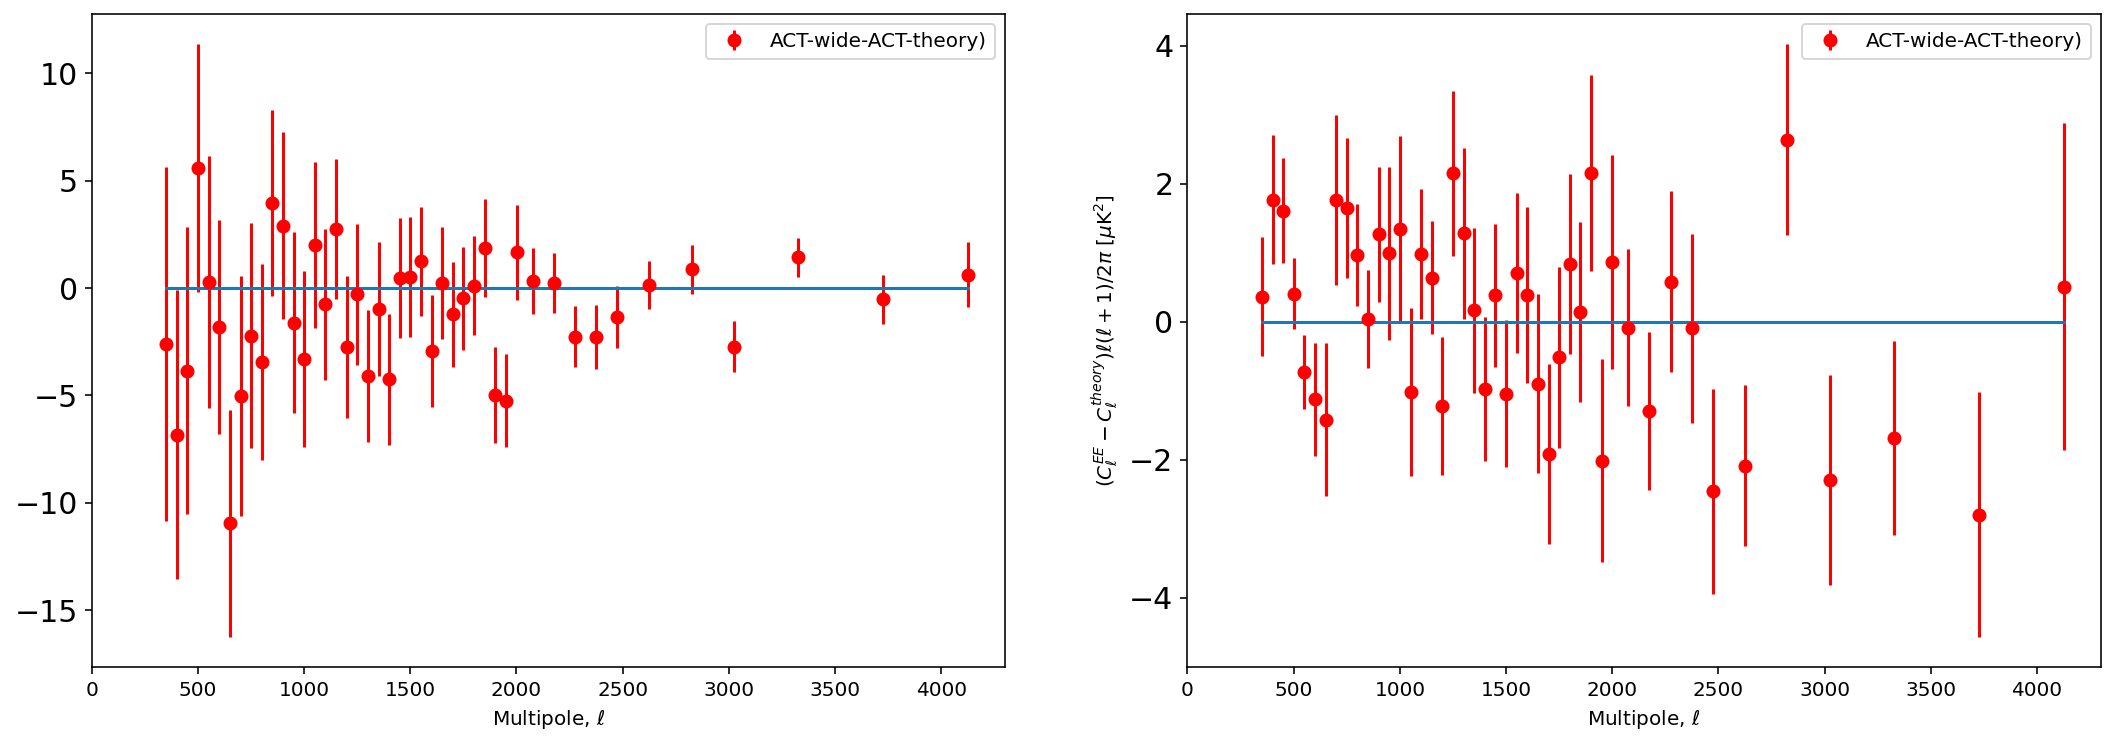

In [27]:
# Plot the residuals
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
plt.errorbar(TE_bval,TE_dat-dth_te,yerr = TE_err, fmt='ro',label="ACT-wide-ACT-theory)")
plt.plot(TE_bval, (TE_dat-dth_te)*0.)
plt.yticks(fontsize=15)
plt.xlim(0,4300)
plt.xlabel(r"Multipole, $\ell$")
plt.legend()

plt.subplot(1,2,2)
plt.errorbar(EE_bval,EE_dat-dth_ee,yerr = EE_err, fmt='ro',label="ACT-wide-ACT-theory)")
plt.plot(EE_bval, (EE_dat-dth_ee)*0.)
plt.yticks(fontsize=15)
plt.xlim(0,4300)
plt.xlabel(r"Multipole, $\ell$")
plt.ylabel(r"$(C_{\ell}^{EE}-C_{\ell}^{theory}) \ell (\ell+1) / 2 \pi$ $[\mu$K$^2]$")
plt.legend()

And finally, we compute our simple, diagonal $\chi^2$ estimate:

In [28]:
# Print out the chi^2 values
chi_act_TE = (TE_dat-dth_te)**2/TE_err**2
print("ACT TE-wide diagonal chi2 = " + "{0:.2f}".format(np.sum(chi_act_TE))+ " for 45 data points")

chi_act_EE = (EE_dat-dth_ee)**2/EE_err**2
print("ACT EE-wide diagonal chi2 = " + "{0:.2f}".format(np.sum(chi_act_EE))+ " for 45 data points")

ACT TE-wide diagonal chi2 = 44.11 for 45 data points
ACT EE-wide diagonal chi2 = 59.54 for 45 data points


## Step 4: Testing an arbitrary cosmological model

Finally, we demonstrate the utility of our likelihood functionality by applying it to an arbitrary cosmological model. Theorists investigating new physics can directly compare their predicted power spectra to the data. Note that just for demonstration purposes, we consider a universe parameterized by the [CAMB](https://camb.readthedocs.io/en/latest/) default values, the ACTPol-only value of $H_0$ (see Aoila et. al.), and a slightly positive curvature:

In [39]:
# first generate an arbitrary set of spectra from CAMB
cosmo_params = camb.model.CAMBparams()

# set H0 to the ACT+WMAP best-fit result, set the universe curvature to be slightly positive
# set lmax for this simulation to match the rest of the notebook 
cosmo_params.set_cosmology(H0 = 67.9, omk = 0.1)
cosmo_params.set_for_lmax(6000)

# retrieve the spectra
res = camb.get_results(cosmo_params)
spectra = res.get_cmb_power_spectra(params = cosmo_params, spectra = ('total',), CMB_unit = 'muK')['total']

We can plot what our new model looks like (visually it is hard to tell the difference to our ACTPol-only maximum likelihood theory):

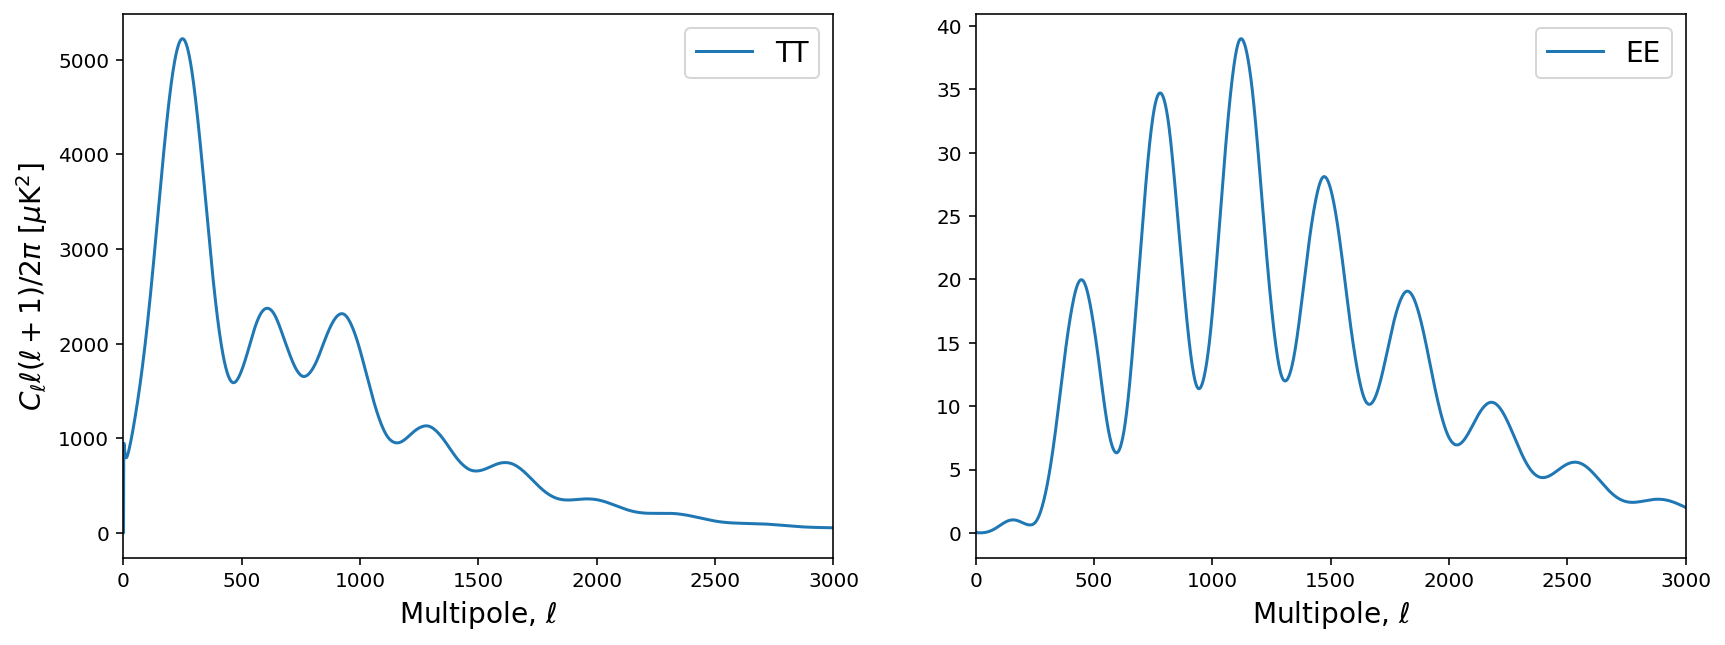

In [41]:
# we can plot the new, theory spectra as before
ell_new = np.arange(spectra.shape[0])
dell_tt_new, dell_ee_new, dell_bb_new, dell_te_new = spectra.T

plt.figure(figsize = (14, 5))

plt.subplot(1,2,1)
plt.plot(ell_new, dell_tt_new, "-", label="TT")
plt.ylabel(r"$C_{\ell} \ell (\ell+1) / 2 \pi$ $[\mu$K$^2]$", fontsize = 14)
plt.xlabel(r"Multipole, $\ell$", fontsize = 14)
plt.legend(fontsize = 14)
plt.xlim(0,3000)

plt.subplot(1,2,2)
plt.plot(ell_new, dell_ee_new, "-", label="EE")
plt.xlabel(r"Multipole, $\ell$", fontsize = 14)
plt.legend(fontsize = 14)
plt.xlim(0,3000)

plt.show()

Now, get the $\chi^2$ for this universe using the ACTPol only likelihood:

In [43]:
# Look at the chi2 using pyactlike
like = pyactlike.ACTPowerSpectrumData()
chi2 = -2 * like.loglike(dell_tt_new, dell_te_new, dell_ee_new, yp2_act_only)
print("ACT only chi2 = " + "{0:.12f}".format(chi2))
print("Expected:       279.004901885481")

ACT only chi2 = 34355.420407462807
Expected:       279.004901885481


Thus our data highly disfavor this particular model of the universe. Of course, the model we concocted was totally arbitrary, and in fact, any set of power spectra can be tested in this way, not just those parameterized by $\Lambda$-CDM.

## Step 5: Using MCMC chains generated using the ACT likelihood to look at parameters

The Likelihood we've introduced above can be used to solve for the best fit cosmological parameters that fit the ACT data.  This process and our results are discussed more in Choi et al 2020 and Aiola et al 2020 but here we will show you how to use one of the MCMC chains to look at the parameters

In [24]:
# Begin by reading in a chain and names of the columns
import pandas as pd

# Read in the column names
names = pd.read_csv(path + "ACTPol_lcdm.paramnames.csv", names = ["parameter", "latex parameter name"])
chain = np.genfromtxt(path + "ACTPol_lcdm_1.txt")
names["parameter"]

0         omegabh2
1         omegach2
2            theta
3              tau
4             logA
5               ns
6               yp
7              H0*
8          omegal*
9          omegam*
10       omegamh2*
11      omeganuh2*
12       omegamh3*
13         sigma8*
14     s8omegamp5*
15    s8omegamp25*
16           s8h5*
17     rmsdeflect*
18           zrei*
19              A*
20          clamp*
21           DL40*
22          DL220*
23          DL810*
24         DL1420*
25         DL2000*
26           ns02*
27        yheused*
28          YpBBN*
29          DHBBN*
30            age*
31          zstar*
32          rstar*
33      thetastar*
34         DAstar*
35          zdrag*
36          rdrag*
37             kd*
38         thetad*
39            zeq*
40            keq*
41        thetaeq*
42      thetarseq*
43        rsDv057*
44      Hubble057*
45          DA057*
46         FAP057*
47    fsigma8z057*
48     sigma8z057*
49    chi2_ACTPol*
50     chi2_prior*
Name: parameter, dtype: object

### Making 1D parapmeter plots and 2D contour plots
Now that we've read in the chain we cna look at the data more cloesly.  It's often useful to look at the 1D and 2D parameter plots, e.g. looking at just H0 or looking at H0 with Omega matter.

In this section we will demonstrate two ways that users can look at both of these plots.  The first is a straightforward example using matplotlib to make 1D and 2D plots for this chain.  The other option is to use [GetDist](https://getdist.readthedocs.io/en/latest/), a public software developed by Antony Lewis (Lewis 2019) specifically for rendering CMB MCMC chains.

We will start with the straightforward matplotlib example.

Text(0, 0.5, 'Probability Density')

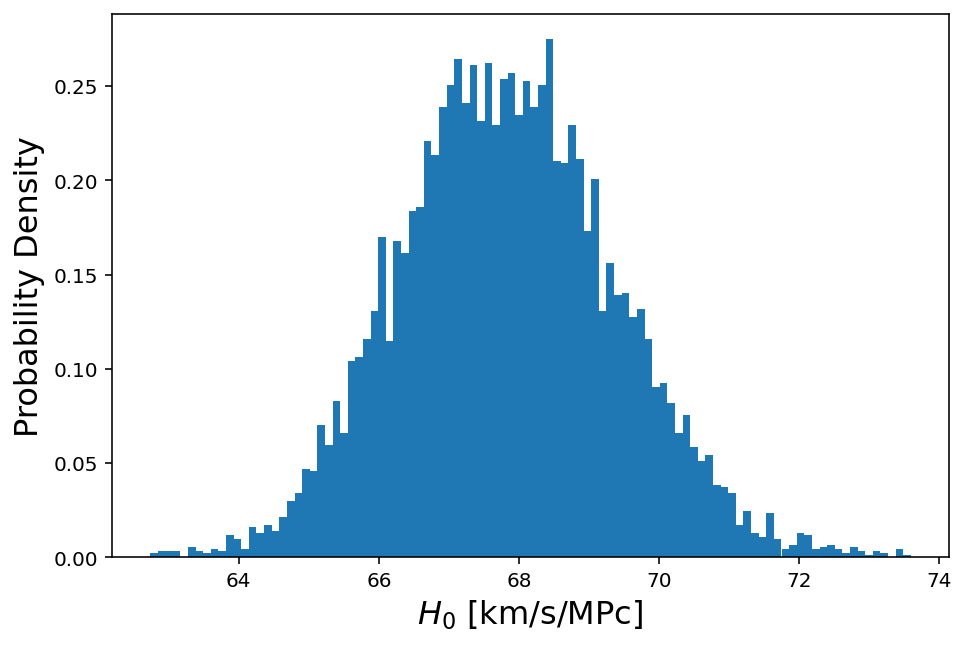

In [31]:
# We begin with the 1D plot of H0

# we use a histogram to look at the data here
plt.figure(figsize = (7.5,5))
plt.hist(chain[:,9], bins = 100, density = True)
plt.xlabel("$H_0$ [km/s/MPc]", fontsize = 16)
plt.ylabel("Probability Density", fontsize = 16)

It's easy to generalize to multi-dimensional projections of the likelihood, e.g. by examining the joint distribution of $H_0$ and $\Omega_m$ now:

Text(0.5, 0, '$H_0$ [km/s/MPc]')

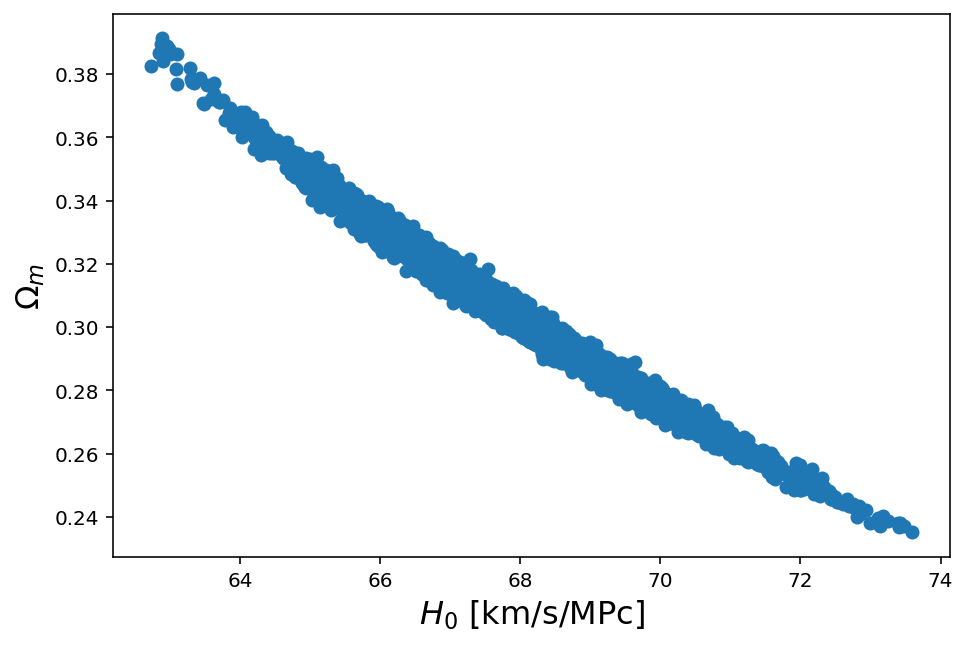

In [32]:
# Now let's try a 2D example adding in Omega Matter

# It's worth noting that since the first two columns of the chains are iteration and likelihood we add +2
# to the column number shown above when calling the columns in our scatter plot (i.e. we want H0 which is the 
# 7th parameter above so we plot chain[:, 9]) to get H0

plt.figure(figsize = (7.5, 5))
plt.scatter(chain[:,9], chain[:,11])
plt.ylabel("$\Omega_m$", fontsize = 16)
plt.xlabel("$H_0$ [km/s/MPc]", fontsize = 16)

Let's now make the same plots using getdist.  We need to start by reading in the files again using the getdist approach.  From there we will walk through how to make the 2 plots above.

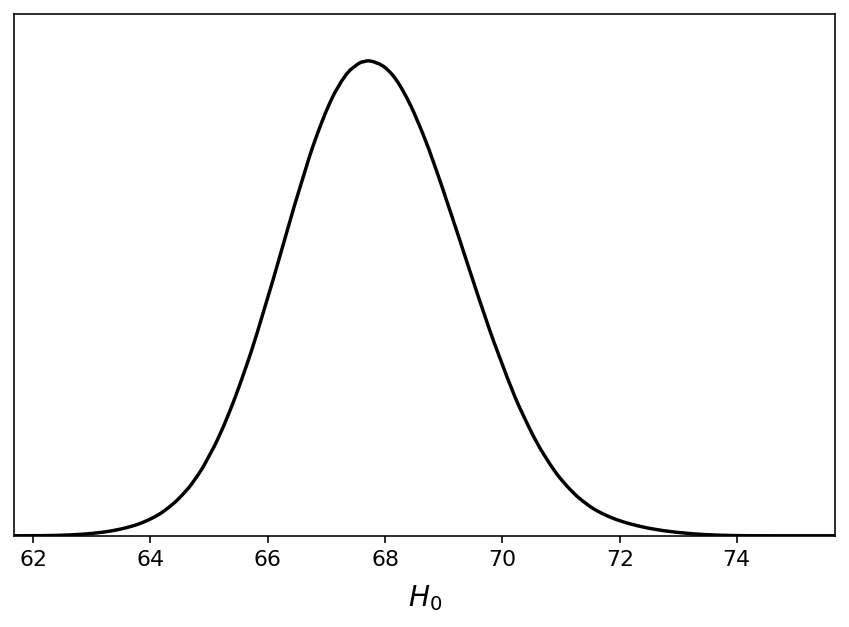

In [37]:
from getdist import loadMCSamples, plots

# Read in the samples
samples = loadMCSamples(path + 'ACTPol_lcdm', path + "ACTPol_lcdm_1.txt")

# Let's again start with the 1D version
g =plots.get_single_plotter()
g.plot_1d(samples, 'H0', marker_color='k')
plt.show()

((61.68027221163013, 75.67826446864929),
 (0.22068028430097586, 0.4208404853228044))

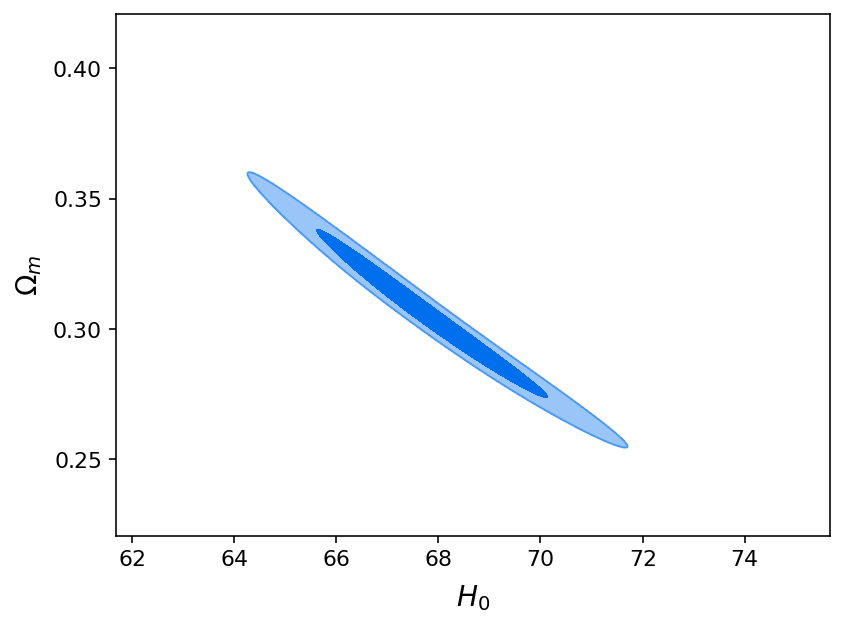

In [38]:
# We can now create a 2D contour plot using the samples we loaded above
g = plots.get_single_plotter()
g.plot_2d(samples, ['H0', 'omegam'], filled=True, )

### Continue to next section:

[Section 12](Section_12_delensing_param_shifts.ipynb):  Delensing the CMB powerspectrum and comparing the delensed and lensed parameters from [Han et al. 2020, in preparation]